<a href="https://colab.research.google.com/github/flohmannjr/TCC530/blob/main/TCC530_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCC530 - Dados

## Importações de bibliotecas

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random

from tensorflow.keras.layers import Embedding, TextVectorization

from sklearn.model_selection import train_test_split

## Configurações

In [2]:
# pd.set_option('display.max_colwidth', None)

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

sns.set_style("darkgrid")

### Constantes

In [3]:
SEMENTE = 2008193

COR = '#305DB8'

LIMITE_DICIONARIO = 80000

## Dados

In [4]:
# Fake.Br Corpus https://github.com/roneysco/Fake.br-Corpus

# dados = pd.read_csv('https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv',
#                     header=0,
#                     names=['index', 'rotulo', 'noticia'],
#                     index_col=['index'])

In [5]:
# Muda rótulos de 'fake' e 'true' para 0 e 1, respectivamente.
# dados['rotulo'].replace({'fake': 0, 'true': 1}, inplace=True)

# Conta e armazena a quantidade de palavras na notícia.
# dados['palavras'] = dados['noticia'].str.split().str.len()

In [6]:
dados = pd.read_csv('https://raw.githubusercontent.com/Edvandro-Nogueira/TCC-Univesp/main/dados_noticias.csv',
                    sep=';')

In [7]:
dados = dados[dados['noticias'].notna()]

In [8]:
dados['palavras'] = dados['noticias'].str.split().str.len()

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10738 entries, 0 to 10757
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   noticias  10738 non-null  object
 1   classe    10738 non-null  int64 
 2   palavras  10738 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 335.6+ KB


In [10]:
dados['classe'].value_counts()

0    6128
1    4610
Name: classe, dtype: int64

In [11]:
dados.sample(5)

,noticias,classe,palavras
4609,havana meio seculo poder absoluto fidel castro...,1,435
7302,Profissão: Metalúrgico. Fortuna: U$ 2 bilhões ...,0,29
6655,veja principais trechos julgamento recurso lul...,1,1028
7853,Golaço do presidente [Bolsonaro]. Se você não ...,0,15
2456,justica federal brasilia determina apreensao p...,0,78


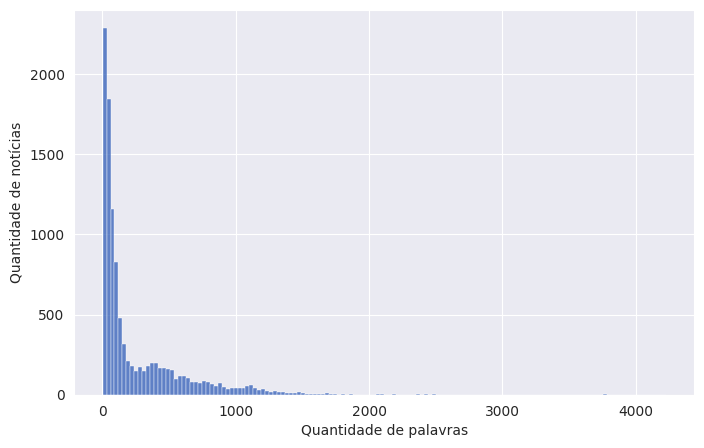

In [12]:
sns.histplot(data=dados, x='palavras', color=COR)

plt.xlabel('Quantidade de palavras')
plt.ylabel('Quantidade de notícias');

In [13]:
# Quantidade máxima de palavras em 99% das notícias.
palavras_99 = int(np.percentile(dados['palavras'], 99))

In [14]:
print(f"Máximo.: {np.max(dados['palavras'])}")
print(f"Média..: {np.mean(dados['palavras'])}")
print(f"99%....: {palavras_99}")

Máximo.: 4229
Média..: 256.1611100763643
99%....: 1453


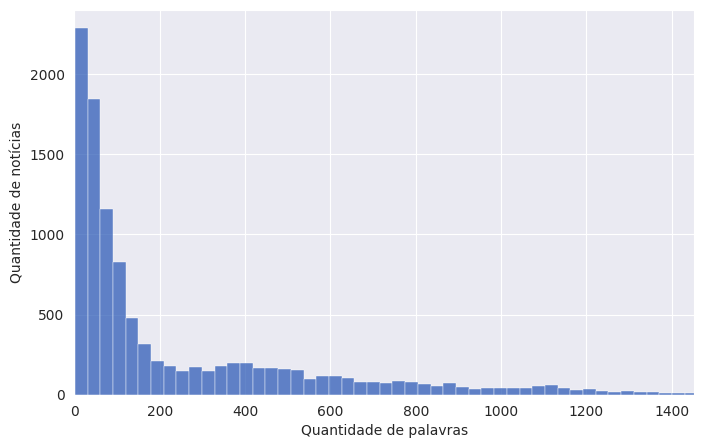

In [15]:
sns.histplot(data=dados, x='palavras', color=COR)

plt.xlim(0, palavras_99)

plt.xlabel('Quantidade de palavras')
plt.ylabel('Quantidade de notícias');

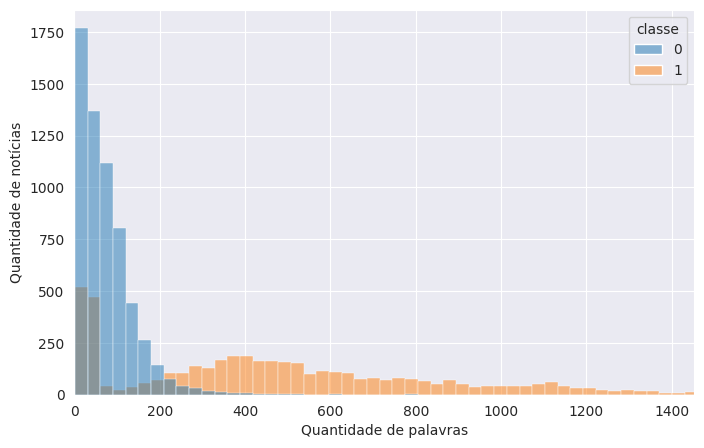

In [16]:
sns.histplot(data=dados, x='palavras', hue='classe')

plt.xlim(0, palavras_99)

plt.xlabel('Quantidade de palavras')
plt.ylabel('Quantidade de notícias');

In [17]:
X = dados['noticias']
y = dados['classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEMENTE)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8590,), (2148,), (8590,), (2148,))

In [19]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('O'), dtype('O'), dtype('int64'), dtype('int64'))

### Converter texto em números

#### Vetorização (Vectorization)

In [20]:
# vetorizador = TextVectorization(max_tokens=LIMITE_DICIONARIO,               # (Default: None) Máximo de tokens (palavras) no dicionário.
#                                 standardize='lower_and_strip_punctuation',  # (Default) Texto em caixa baixa e retira caracteres especiais.
#                                 split='whitespace',                         # (Default) Separador de tokens.
#                                 ngrams=None,                                # (Default) Tokens por grupo. (None = não agrupar tokens.)
#                                 output_mode='int',                          # (Default) Como mapear tokens para números.
#                                 output_sequence_length=palavras_99)         # (Default: None) Tamanho do texto, completado ou truncado, se necessário. (Válido apenas para 'int'.)

In [21]:
# vetorizador.adapt(X_train)

In [22]:
# texto = random.choice(X_train)
# print(texto)

# vet = vetorizador([texto])

In [23]:
# with np.printoptions(threshold=np.inf):
#     print(vet)

In [24]:
# vocabulario = vetorizador.get_vocabulary()

In [25]:
# [UNK] = Desconhecido, fora do limite do dicionário.
# len(vocabulario), vocabulario[:8], vocabulario[-8:]

#### Incorporação (Embedding)

In [26]:
# incorporador = Embedding(input_dim=LIMITE_DICIONARIO,  # Tamanho do vocabulário de entrada.
#                          output_dim=128,               # Dimensão do vetor de saída. (Geralmente um múltiplo de 8.)
#                          input_length=palavras_99)     # Tamanho do texto de entrada.

In [27]:
# texto = random.choice(X_train)
# print(texto)

# incorporador(vetorizador([texto]))